In [ ]:
import E515
import time
from gpiozero import LED
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
e = E515.E515(vthreshold=False)

NameError: name 'factory' is not defined

# Get Positions

In [26]:
# Initialize variables
# x, y, z = 0, 0, 0

# Assuming e.get_pos_servo(i) returns i+1 for this example
for i in range(1,4):
    if i == 1:
        x = e.get_pos_servo(i)
    elif i == 2:
        y = e.get_pos_servo(i)
    elif i == 3:
        z = e.get_pos_servo(i)

# Print the results
print(f"x = {x} , y = {y} , z = {z} in µm")


x = 54.21 , y = 43.09 , z = 60.76 in µm


# Get corresponding voltages

In [27]:
# Initialize variables
x, y, z = 0, 0, 0

# Assuming e.get_pos(i) returns i+1 for this example
for i in range(1,4):
    if i == 1:
        x = e.get_pos(i)
    elif i == 2:
        y = e.get_pos(i)
    elif i == 3:
        z = e.get_pos(i)

# Print the results
print(f"x = {x} , y = {y} , z = {z} V")

x = 0.1 , y = 0.1 , z = 0.2 V


# Read current servo status

In [12]:
# Initialize variables
x, y, z = 0, 0, 0

# Assuming e.get_servo(i) returns a byte string like b'OFF\n' for this example
for i in range(1, 4):
    if i == 1:
        x = e.get_servo(i).decode('utf-8').strip()
    elif i == 2:
        y = e.get_servo(i).decode('utf-8').strip()
    elif i == 3:
        z = e.get_servo(i).decode('utf-8').strip()

# Print the results without the 'b' prefix and newline character
print(f"state: x = {x}, y = {y}, z = {z}")


state: x = OFF, y = OFF, z = OFF


# Set position based on um

In [24]:
# Not now

# Set position based on V

In [33]:
# Initialize variables
x, y, z = 0, 0, 0

# Assuming e.set_pos(pos, channel) returns i+1 for this example
for i in range(1,4):
    if i == 1:
        x = e.set_pos(0, i)     # params position in volt=0V, channel number
    elif i == 2:
        y = e.set_pos(0, i)
    elif i == 3:
        z = e.set_pos(0, i)

# Print the results
print(f"x = {x} , y = {y} , z = {z} V")

x = None , y = None , z = None V


# Get voltages and its corresponding distance in x-direction (ch1)

In [17]:
import time
# Initialize variables
x_values = []
voltage_values = []

# Scan the x-axis from 0 to 100 V with a step size of 0.01 V
for v in np.arange(0, 100, 1):
    # Set the voltage on channel 1 (assuming e.set_voltage(voltage, channel) is the method to set the voltage)
    e.set_pos(v, 1)
    time.sleep(0.5)
    
    # Get the position of x (assuming e.get_pos(channel) returns the position for the given channel)
    x = e.get_pos_servo(1)
    
    # Store the values
    x_values.append(x)
    voltage_values.append(v)
    
    # Print the current step
    print(f"Voltage: {v:.2f} V, x: {x} µm")

# Create a DataFrame to store the scan data
df = pd.DataFrame({
    'Voltage (V)': voltage_values,
    'Position (µm)': x_values
})

# Save the DataFrame to a CSV file
df.to_csv('x_1.csv', index=False)

print("Scan complete. Data saved to x_1.csv.")


Voltage: 0.00 V, x: 51.94 µm
Voltage: 1.00 V, x: 52.3 µm
Voltage: 2.00 V, x: 53.02 µm
Voltage: 3.00 V, x: 53.73 µm
Voltage: 4.00 V, x: 54.76 µm
Voltage: 5.00 V, x: 55.3 µm
Voltage: 6.00 V, x: 56.07 µm
Voltage: 7.00 V, x: 56.93 µm
Voltage: 8.00 V, x: 57.74 µm
Voltage: 9.00 V, x: 58.57 µm
Voltage: 10.00 V, x: 59.48 µm
Voltage: 11.00 V, x: 60.32 µm
Voltage: 12.00 V, x: 61.49 µm
Voltage: 13.00 V, x: 62.14 µm
Voltage: 14.00 V, x: 63.0 µm
Voltage: 15.00 V, x: 64.01 µm
Voltage: 16.00 V, x: 64.91 µm
Voltage: 17.00 V, x: 66.17 µm
Voltage: 18.00 V, x: 66.88 µm
Voltage: 19.00 V, x: 67.8 µm
Voltage: 20.00 V, x: 68.86 µm
Voltage: 21.00 V, x: 69.81 µm
Voltage: 22.00 V, x: 70.78 µm
Voltage: 23.00 V, x: 71.9 µm
Voltage: 24.00 V, x: 72.88 µm
Voltage: 25.00 V, x: 74.24 µm
Voltage: 26.00 V, x: 75.02 µm
Voltage: 27.00 V, x: 76.0 µm
Voltage: 28.00 V, x: 77.18 µm
Voltage: 29.00 V, x: 78.19 µm
Voltage: 30.00 V, x: 79.21 µm
Voltage: 31.00 V, x: 80.42 µm
Voltage: 32.00 V, x: 81.44 µm
Voltage: 33.00 V, x: 82.86

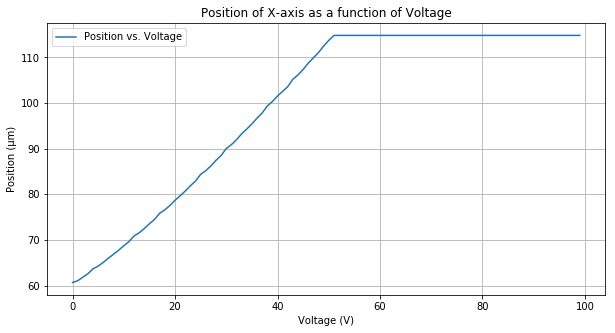

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from x_v.csv
data = pd.read_csv('x_1.csv')

# Convert the pandas series to numpy arrays
voltage_x = data['Voltage (V)'].to_numpy()
position_x = data['Position (µm)'].to_numpy()

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(voltage, position, label='Position vs. Voltage')
plt.xlabel('Voltage (V)')
plt.ylabel('Position (µm)')
plt.title('Position of X-axis as a function of Voltage')
plt.legend()
plt.grid(True)
plt.show()


# y-axis scan

In [28]:
import time
# Initialize variables
y_values = []
voltage_values = []

# Scan the y-axis from 0 to 100 V with a step size of 1 V
for v in np.arange(0, 100, 1):
    # Set the voltage on channel 3 (assuming e.set_voltage(voltage, channel) is the method to set the voltage)
    e.set_pos(v, 3)
    time.sleep(0.5)
    
    # Get the position of y (assuming e.get_pos(channel) returns the position for the given channel)
    y = e.get_pos_servo(3)
    
    # Store the values
    y_values.append(y)
    voltage_values.append(v)
    
    # Print the current step
    print(f"Voltage: {v:.2f} V, y: {y} µm")

# Create a DataFrame to store the scan data
df = pd.DataFrame({
    'Voltage (V)': voltage_values,
    'Position (µm)': y_values
})

# Save the DataFrame to a CSV file
df.to_csv('y_1.csv', index=False)

print("Scan complete. Data saved to y_1.csv.")


Voltage: 0.00 V, y: 60.67 µm
Voltage: 1.00 V, y: 61.04 µm
Voltage: 2.00 V, y: 61.81 µm
Voltage: 3.00 V, y: 62.58 µm
Voltage: 4.00 V, y: 63.67 µm
Voltage: 5.00 V, y: 64.24 µm
Voltage: 6.00 V, y: 65.07 µm
Voltage: 7.00 V, y: 66.0 µm
Voltage: 8.00 V, y: 66.86 µm
Voltage: 9.00 V, y: 67.74 µm
Voltage: 10.00 V, y: 68.72 µm
Voltage: 11.00 V, y: 69.61 µm
Voltage: 12.00 V, y: 70.86 µm
Voltage: 13.00 V, y: 71.56 µm
Voltage: 14.00 V, y: 72.48 µm
Voltage: 15.00 V, y: 73.54 µm
Voltage: 16.00 V, y: 74.49 µm
Voltage: 17.00 V, y: 75.84 µm
Voltage: 18.00 V, y: 76.57 µm
Voltage: 19.00 V, y: 77.54 µm
Voltage: 20.00 V, y: 78.68 µm
Voltage: 21.00 V, y: 79.69 µm
Voltage: 22.00 V, y: 80.7 µm
Voltage: 23.00 V, y: 81.87 µm
Voltage: 24.00 V, y: 82.9 µm
Voltage: 25.00 V, y: 84.36 µm
Voltage: 26.00 V, y: 85.17 µm
Voltage: 27.00 V, y: 86.22 µm
Voltage: 28.00 V, y: 87.45 µm
Voltage: 29.00 V, y: 88.52 µm
Voltage: 30.00 V, y: 90.03 µm
Voltage: 31.00 V, y: 90.87 µm
Voltage: 32.00 V, y: 91.96 µm
Voltage: 33.00 V, y: 93

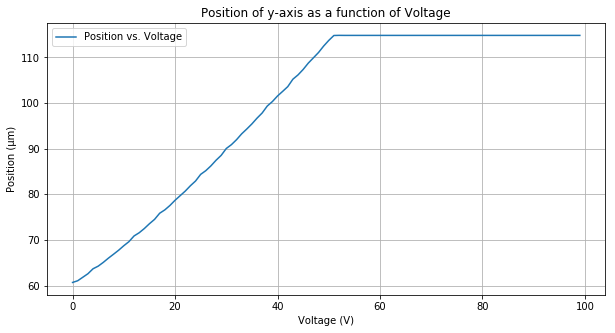

In [35]:
# Load the data from x_v.csv
data = pd.read_csv('y_1.csv')

# Convert the pandas series to numpy arrays
voltage_y = data['Voltage (V)'].to_numpy()
position_y = data['Position (µm)'].to_numpy()

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(voltage, position, label='Position vs. Voltage')
plt.xlabel('Voltage (V)')
plt.ylabel('Position (µm)')
plt.title('Position of y-axis as a function of Voltage')
plt.legend()
plt.grid(True)
plt.show()


# z-axis scan

In [34]:
import time
# Initialize variables
z_values = []
voltage_values = []

# Scan the z-axis from 0 to 100 V with a step size of 1 V
for v in np.arange(0, 100, 1):
    # Set the voltage on channel 3 (assuming e.set_voltage(voltage, channel) is the method to set the voltage)
    e.set_pos(v,2)
    time.sleep(0.5)
    
    # Get the position of z (assuming e.get_pos(channel) returns the position for the given channel)
    z = e.get_pos_servo(2)
    
    # Store the values
    z_values.append(z)
    voltage_values.append(v)
    
    # Print the current step
    print(f"Voltage: {v:.2f} V, z: {z} µm")

# Create a DataFrame to store the scan data
df = pd.DataFrame({
    'Voltage (V)': voltage_values,
    'Position (µm)': z_values
})

# Save the DataFrame to a CSV file
df.to_csv('z_1.csv', index=False)

print("Scan complete. Data saved to z_1.csv.")


Voltage: 0.00 V, z: 47.55 µm
Voltage: 1.00 V, z: 47.9 µm
Voltage: 2.00 V, z: 48.59 µm
Voltage: 3.00 V, z: 49.28 µm
Voltage: 4.00 V, z: 50.25 µm
Voltage: 5.00 V, z: 50.77 µm
Voltage: 6.00 V, z: 51.51 µm
Voltage: 7.00 V, z: 52.33 µm
Voltage: 8.00 V, z: 53.11 µm
Voltage: 9.00 V, z: 54.19 µm
Voltage: 10.00 V, z: 54.77 µm
Voltage: 11.00 V, z: 55.58 µm
Voltage: 12.00 V, z: 56.48 µm
Voltage: 13.00 V, z: 57.31 µm
Voltage: 14.00 V, z: 58.16 µm
Voltage: 15.00 V, z: 59.12 µm
Voltage: 16.00 V, z: 59.98 µm
Voltage: 17.00 V, z: 61.17 µm
Voltage: 18.00 V, z: 61.84 µm
Voltage: 19.00 V, z: 62.71 µm
Voltage: 20.00 V, z: 63.73 µm
Voltage: 21.00 V, z: 64.63 µm
Voltage: 22.00 V, z: 65.96 µm
Voltage: 23.00 V, z: 66.69 µm
Voltage: 24.00 V, z: 67.74 µm
Voltage: 25.00 V, z: 68.82 µm
Voltage: 26.00 V, z: 69.72 µm
Voltage: 27.00 V, z: 70.65 µm
Voltage: 28.00 V, z: 71.59 µm
Voltage: 29.00 V, z: 72.55 µm
Voltage: 30.00 V, z: 74.7 µm
Voltage: 31.00 V, z: 75.66 µm
Voltage: 32.00 V, z: 76.78 µm
Voltage: 33.00 V, z: 7

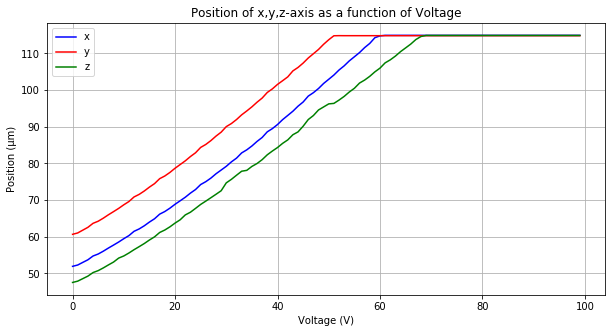

In [38]:
# Load the data from x_v.csv
data = pd.read_csv('z_1.csv')

# Convert the pandas series to numpy arrays
voltage_z = data['Voltage (V)'].to_numpy()
position_z = data['Position (µm)'].to_numpy()

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(voltage_x, position_x, label='x', color='b')
plt.plot(voltage_y, position_y, label='y', color='r')
plt.plot(voltage_z, position_z, label='z', color='g')
plt.xlabel('Voltage (V)')
plt.ylabel('Position (µm)')
plt.title('Position of x,y,z-axis as a function of Voltage')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
# !pip install scipy.optimize

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement scipy.optimize (from versions: none)
ERROR: No matching distribution found for scipy.optimize


In [1]:
# df = pd.read_csv('y_vs_v.csv')
# voltage_y = df['volts (V)'].to_numpy()
# actual_pos_y = df['actual_distance (mm)'].to_numpy()
# pi_pos_y = df['distance_pi (um)'].to_numpy()

# plt.figure(figsize=(10, 5))
# plt.plot(voltage_y, actual_pos_y, label='actual position', color='b')
# plt.plot(voltage_y, pi_pos_y, label='code position ouput', color='r')
# plt.xlabel('Voltage (V)')
# plt.ylabel('Position (µm)')
# plt.title('Position of y-axis as a function of Voltage')
# plt.legend()
# plt.grid(True)
# plt.show()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Read the data from the CSV file
df = pd.read_csv('y_vs_v.csv')
voltage_y = df['volts (V)'].to_numpy()
actual_pos_y = df['actual_distance (mm)'].to_numpy()
pi_pos_y = df['distance_pi (um)'].to_numpy()

# Define the function for a linear regression line
def linear_regression(v, a, b):
    return a * v + b

# Fit the linear regression line to the data
params, covariance = curve_fit(linear_regression, voltage_y, actual_pos_y)

# Extract the fitted parameters
a_fit, b_fit = params

# Generate the fitted line
voltage_fit = np.linspace(min(voltage_y), max(voltage_y), 100)
pos_fit = linear_regression(voltage_fit, a_fit, b_fit)

# Plot the data and the fitted line
plt.figure(figsize=(10, 5))
plt.plot(voltage_y, actual_pos_y, label='actual position', color='b')
plt.plot(voltage_y, pi_pos_y, label='code position output', color='r')
plt.plot(voltage_fit, pos_fit, label='fitted line', color='g', linestyle='--')
plt.xlabel('Voltage (V)')
plt.ylabel('Position (µm)')
plt.title('Position of y-axis as a function of Voltage')
plt.legend()
plt.grid(True)
plt.show()

# Print the fitted coefficients
print(f"Fitted coefficients: a = {a_fit:.2f}, b = {b_fit:.2f}")


ModuleNotFoundError: No module named 'pandas'

In [11]:
df

,volts (V),distance (mm),actual_distance (um),distance_pi (um)
0,0,0,0.000000,57.37
1,1,0,0.000000,58.11
2,2,1,0.000001,58.90
3,3,2,0.000002,59.70
4,4,2,0.000002,60.52
...,...,...,...,...
96,96,113,0.000113,114.82
97,97,114,0.000114,114.82
98,98,115,0.000115,114.82
99,99,116,0.000116,114.82
